In [1]:
# 1. Setup - importing the packages 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn, os, pickle

In [2]:
filepath = 'Data\ecommerceDataset.csv'
df= pd.read_csv(filepath, header=None)
df.columns = ['category', 'review']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  50425 non-null  object
 1   review    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [3]:
df.head()

,category,review
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
#v 3. Data Inspection
print("Shape of the data:", df.shape)
print("Data description:\n", df.describe().transpose())
print("NA values:\n", df.isna().sum())
print("Duplicated:\n", df.duplicated().sum())
print("Value counts:\n", df['category'].value_counts())

Shape of the data: (50425, 2)
Data description:
           count unique                                                top  \
category  50425      4                                          Household   
review    50424  27802  Think & Grow Rich About the Author NAPOLEON HI...   

           freq  
category  19313  
review       30  
NA values:
 category    0
review      1
dtype: int64
Duplicated:
 22622
Value counts:
 category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [5]:
#4. Data Preprocessing
# (A) Isolate the features and labels

features = df['review'].astype(str)
labels = df['category'].values

# (B) perform label encoding on category column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [6]:
#5. Perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, train_size=0.8, random_state=42)

In [7]:
#6. tokenization'
# Define hyperparameters
vocab_size = 10000
oov_token = "<OOV>"
max_length = 400
embedding_dim = 200

# Define the tokenizer object
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,
    oov_token=oov_token,
    split=" "
)

tokenizer.fit_on_texts(X_train)

In [8]:
#inspection on the tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'for': 7,
 'in': 8,
 'with': 9,
 'is': 10,
 'your': 11,
 'you': 12,
 'it': 13,
 'this': 14,
 'on': 15,
 'that': 16,
 'from': 17,
 'or': 18,
 'can': 19,
 'as': 20,
 'are': 21,
 '1': 22,
 'be': 23,
 'an': 24,
 'all': 25,
 'has': 26,
 '2': 27,
 'at': 28,
 'by': 29,
 '3': 30,
 'will': 31,
 '5': 32,
 'book': 33,
 'size': 34,
 'x': 35,
 'set': 36,
 'use': 37,
 'easy': 38,
 'quality': 39,
 'one': 40,
 'not': 41,
 'up': 42,
 'which': 43,
 'about': 44,
 'have': 45,
 'high': 46,
 'he': 47,
 'black': 48,
 'also': 49,
 'product': 50,
 '4': 51,
 'made': 52,
 'home': 53,
 'design': 54,
 'more': 55,
 'author': 56,
 'our': 57,
 'his': 58,
 'any': 59,
 'its': 60,
 'color': 61,
 'new': 62,
 'power': 63,
 'time': 64,
 'we': 65,
 '6': 66,
 'cotton': 67,
 'these': 68,
 'usb': 69,
 'other': 70,
 'best': 71,
 'perfect': 72,
 'comes': 73,
 'light': 74,
 'most': 75,
 'make': 76,
 'features': 77,
 'no': 78,
 'so': 79,
 'used': 80,
 'when': 81,
 '0

In [9]:
# Use the tokenizer totransform text to token
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)
print(X_train[0])
print(X_train_token[0])

Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss

In [10]:
# 7. Perform padding and truncating
X_train_padded = keras.utils.pad_sequences(
    X_train_token,
    maxlen=max_length,
    padding='post',
    truncating='post') #new version

X_test_padded = keras.utils.pad_sequences(
    X_test_token,
    maxlen=max_length,
    padding='post',
    truncating='post') #new version

print(X_train_padded.shape)

(40340, 400)


In [11]:
#creta a function that can decade the token
# (A) Create a reversed word index
reversed_word_index = dict([(value,key) for (key,value) in word_index.items()])
reversed_word_index

{1: '<OOV>',
 2: 'the',
 3: 'and',
 4: 'of',
 5: 'to',
 6: 'a',
 7: 'for',
 8: 'in',
 9: 'with',
 10: 'is',
 11: 'your',
 12: 'you',
 13: 'it',
 14: 'this',
 15: 'on',
 16: 'that',
 17: 'from',
 18: 'or',
 19: 'can',
 20: 'as',
 21: 'are',
 22: '1',
 23: 'be',
 24: 'an',
 25: 'all',
 26: 'has',
 27: '2',
 28: 'at',
 29: 'by',
 30: '3',
 31: 'will',
 32: '5',
 33: 'book',
 34: 'size',
 35: 'x',
 36: 'set',
 37: 'use',
 38: 'easy',
 39: 'quality',
 40: 'one',
 41: 'not',
 42: 'up',
 43: 'which',
 44: 'about',
 45: 'have',
 46: 'high',
 47: 'he',
 48: 'black',
 49: 'also',
 50: 'product',
 51: '4',
 52: 'made',
 53: 'home',
 54: 'design',
 55: 'more',
 56: 'author',
 57: 'our',
 58: 'his',
 59: 'any',
 60: 'its',
 61: 'color',
 62: 'new',
 63: 'power',
 64: 'time',
 65: 'we',
 66: '6',
 67: 'cotton',
 68: 'these',
 69: 'usb',
 70: 'other',
 71: 'best',
 72: 'perfect',
 73: 'comes',
 74: 'light',
 75: 'most',
 76: 'make',
 77: 'features',
 78: 'no',
 79: 'so',
 80: 'used',
 81: 'when',
 82

In [12]:
def decode_token(tokens):
    return " ".join([reversed_word_index.get(i,"?") for i in tokens])

print(X_train[3])
print("****************")
print(decode_token(X_train_padded[3]))

SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract and mysteriously beautiful. The painting has a nice frame to it. You can gift this to a family or a friend. The painting has various forms of certain figures on it as seen in the image. You can add a good set of lights to the place where the painting is and the decor will give a different feel and look to the place. Quality and durability the painting has a matte finish and includes a good quality fram

In [13]:
# Define the model
model = keras.Sequential()

# Add the embedding layer for token embedding
model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# Add LSTM layer(s)
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))  # Bidirectional LSTM with 64 units
model.add(keras.layers.Dropout(0.5))  # Dropout layer for regularization
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=False)))  # Bidirectional LSTM with 64 units
model.add(keras.layers.Dropout(0.5))  # Dropout layer for regularization
# Add Dense layer for classification
model.add(keras.layers.Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(keras.layers.Dropout(0.5))  # Dropout layer for regularization
# Output layer
model.add(keras.layers.Dense(len(np.unique(labels)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        135680    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1

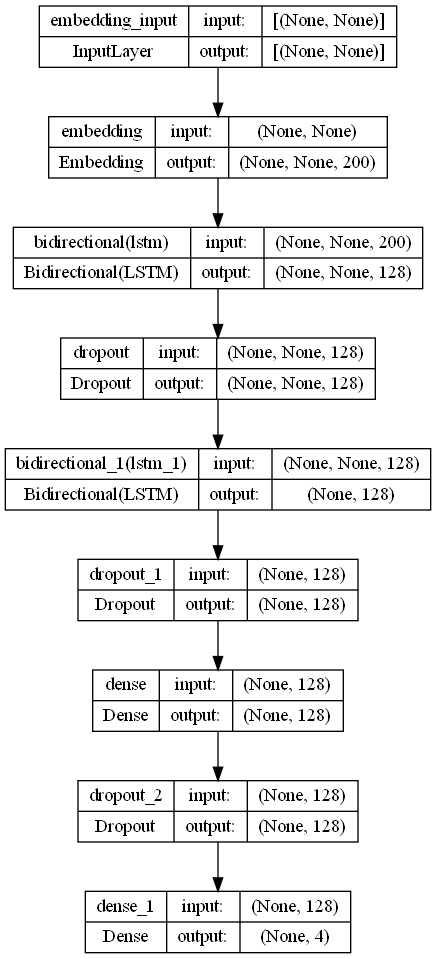

In [14]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [15]:
from keras.callbacks import TensorBoard
import datetime

# Write directory for save mpdel deep learning
MODEL_PATH = os.path.join(os.getcwd(),'models', 'model.h5')
LOGS_PATH = os.path.join(os.getcwd(),'tensorboard_logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [16]:
#9. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#10. Model training
tensorboard_callback = TensorBoard(LOGS_PATH)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

#Train Model
max_epoch = 10
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded,y_test), epochs=max_epoch, callbacks=[early_stopping, tensorboard_callback])


Epoch 1/10
1261/1261 [==============================] - 147s 110ms/step - loss: 0.2291 - accuracy: 0.9299 - val_loss: 0.1212 - val_accuracy: 0.9703
Epoch 2/10
1261/1261 [==============================] - 143s 113ms/step - loss: 0.0807 - accuracy: 0.9809 - val_loss: 0.1334 - val_accuracy: 0.9664
Epoch 3/10
1261/1261 [==============================] - 162s 128ms/step - loss: 0.0523 - accuracy: 0.9870 - val_loss: 0.1201 - val_accuracy: 0.9760
Epoch 4/10
1261/1261 [==============================] - 161s 128ms/step - loss: 0.0360 - accuracy: 0.9913 - val_loss: 0.1249 - val_accuracy: 0.9714
Epoch 5/10
1261/1261 [==============================] - 155s 123ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.1472 - val_accuracy: 0.9752


In [17]:
model.save(MODEL_PATH)

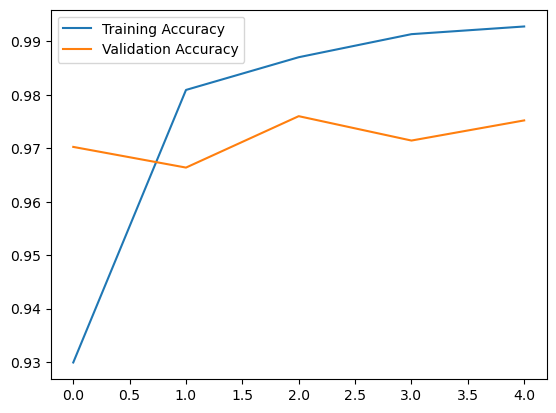

In [18]:
#(B) Accuracy grapyh
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

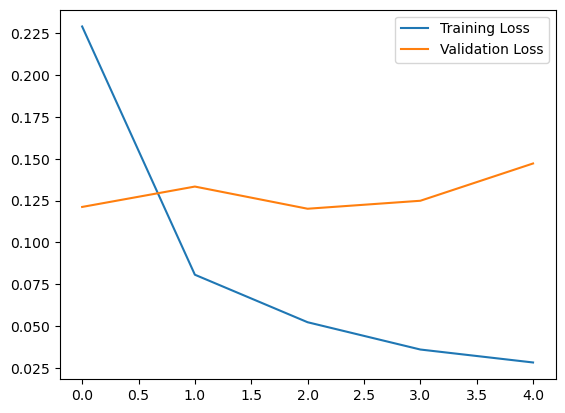

In [19]:
#Training result
#Plot the graphs of loss and accuracy
#(A) loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [20]:
#10. Model deployment
#(A) Have an example input
test_string = r"The new smartphone has a stunning display and a powerful camera."
#(B) Apply preprocessing to the string]
test_token = tokenizer.texts_to_sequences(test_string)
test_token

#Create a function to remove empty array
def remove_empty(tokens):
    temp = []
    for i in tokens:
        if i != []:
            temp.append(i[0])
    return temp

test_token_processed = np.expand_dims(np.array(remove_empty(test_token)), axis=0)
test_token_processed.shape


(1, 53)

In [21]:
#Perform padding 
test_token_padded = tf.keras.utils.pad_sequences(
    test_token_processed,
    maxlen=max_length,
    padding='post',
    truncating='post'
)

In [22]:
#(C) Perform prediction using the model
y_pred = np.argmax(model.predict(test_token_padded))

# Use the label encoder to find the class
class_prediction = label_encoder.inverse_transform(y_pred.flatten())
class_prediction

1/1 [==============================] - 1s 1s/step


array(['Electronics'], dtype=object)

In [23]:
#11. Save the important component so that we can deploy then in another application
# (A) Label encoder
label_encoder_save_path = "label_encoder_ecommerce.pkl"
with open(label_encoder_save_path, "wb") as f:
    pickle.dump(label_encoder, f)
    
#(B) tokenizer
tokenizer_save_path = "tokenizer_ecommerce.pkl"
with open(tokenizer_save_path, "wb") as f:
    pickle.dump(tokenizer, f)